# Inżynieria lingwistyczna
Ten notebook jest oceniany półautomatycznie. Nie twórz ani nie usuwaj komórek - struktura notebooka musi zostać zachowana. Odpowiedź wypełnij tam gdzie jest na to wskazane miejsce - odpowiedzi w innych miejscach nie będą sprawdzane (nie są widoczne dla sprawdzającego w systemie).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Zadanie 1 - tokenizacja (12 pkt)

Jedną z nowoczesnych technik tokenizacji jest BPE - byte-pair encoding [1]. Technika ta polega na podzielenie słów na częste podsłowa (morfemy). W przeciwieństwie do podejść lingwistycznych, wymagających reguł tworzenia morfemów, BPE wyznacza je automatycznie poprzez wyznaczenie najczęstszych przylegających do siebie sekwencji znaków które występują obok siebie.

Algorytm przebiega w następujących krokach.
1. Podziel wszystkie słowa na symbole (początkowo pojedyncze znaki)
2. Wyznacz najczęściej występującą obok siebie parę symboli 
3. Stwórz nowy symbol będący konkatenacją dwóch najczęstszych symboli.

Uwaga 1: każde słowo zakończone jest specjalnym symbolem końca wyrazu.

Uwaga 2: tworzenie nowego symbolu nie powoduje usuniecie starego tj. zawsze jednym z możliwych symboli jest pojedynczy znak, ale jeśli można to stosujemy symbol dłuższy.

Przykład: korpus w którym występuje ,,ala'' 5 razy i ,,mama 10 razy''
1. Dzielimy słowa na symbole ,,a l a END'' ,,m a m a END''  gdzie END jest symbolem końca wyrazu.
2. Najczęstsza para obok siebie to ,,m a'' (20) razy
3. Nowy symbol ,,ma''
4. Nowy podział ,,a l a END'' ,,ma ma END''
5. Najczęstsza para ,,ma ma'' (10) razy
6. Nowy symbol ,,mama''
7. Nowy podział ,,a l a END'' ,,mama END''
8. itd.

W pliku ,,brown_clusters.tsv'' pierwsza kolumna to identyfikator skupienia (nie używamy w tym zadaniu), druga kolumna to wyrazy, a trzecia to ich liczności w pewnym korpusie tweetów. Zaimplementuj technike BPE na tych słowach.

Zaimplementuj algorytm BPE wykonujący `number_of_iterations` iteracji (łączeń symboli).

[1] Sennrich, R., Haddow, B., and Birch, A. (2016). Neural machine translation of rare words with subword units. In ACL 2016.

In [1]:
import pandas as pd
import numpy as np
brown_df = pd.read_csv('brown_clusters.tsv', sep='\t', header=0, names=['cluster', 'word', 'count'])

number_of_iterations = 10
def preform_bpe(brown_df, number_of_iterations, shout=False):
    """
    Funckcja przyjmuje ramkę w formacie analogicznym do obiektu brown_df (wczytany wyżej)
     oraz liczbę iteracji.
    Wyjściem funkcji powinna być lista słów z poszczególnymi tokenami/symbolami oddzielonymi spacją.
    Za znak końca wyrazu przyjmij END. 
    """
    data = [(list(row[0]) + ['END'], row[1]) for _,row in brown_df.dropna()[['word', 'count']].iterrows()]  

    for itr in range(number_of_iterations):
        counted_pairs = {}
        for i in range(len(data)):
            wrd, cnt = data[i]
            for pair in list(zip(wrd, wrd[1:])):
                counted_pairs[pair] = counted_pairs[pair] + 1*cnt if counted_pairs.get(pair) is not None \
                        else 1*cnt
        best_pair, _ = max(counted_pairs.items(), key=lambda x: x[1])
        if shout:
            print(best_pair)
        for i in range(len(data)):
            wrd, cnt = data[i]
            new_wrd = []
            e = 0
            shifted = list(zip(wrd, wrd[1:]))
            while e<len(shifted):
                if shifted[e]==best_pair:
                    new_wrd = new_wrd + [''.join([shifted[e][0], shifted[e][1]])]
                    if e==len(shifted)-2:
                        new_wrd.append(shifted[e+1][1])
                    e+=2
                elif e!=len(shifted)-1:
                    new_wrd = new_wrd + [shifted[e][0]]
                    e+=1
                else:
                    new_wrd = new_wrd + [shifted[e][0]] + [shifted[e][1]]
                    e+=1

            data[i] = (new_wrd, cnt)
        if itr==number_of_iterations-1:
            return [' '.join(e[0]) for e in data]
            

Test implementacji:

In [2]:
from nose.tools import assert_list_equal
data = {'cluster': range(2), 'word':['ala', 'mama'], 'count': [5,10]}
df = pd.DataFrame (data, columns = ['cluster', 'word', 'count'])
vocab = preform_bpe(df, 1)
assert_list_equal(vocab, ['a l a END', 'ma ma END'])

Spraw aby Twoja implementacja wypisywała kolejne łączone ze sobą symbole i uruchom Twoją funkcję na np. 50 iteracji, obserwując jakie tokeny są tworzone.

In [3]:
_ = preform_bpe(brown_df, 50, True)

('e', 'END')
('t', 'END')
('s', 'END')
('i', 'n')
('t', 'h')
('d', 'END')
('y', 'END')
('.', 'END')
('o', 'END')
('r', 'END')
('>', 'END')
('a', 'n')
('o', 'n')
('o', 'u')
('g', 'END')
('a', 'END')
('l', 'END')
('in', 'gEND')
('<', '@')
('<@', 'M')
('<@M', 'E')
('<@ME', 'N')
('<@MEN', 'T')
('<@MENT', 'I')
('<@MENTI', 'O')
('<@MENTIO', 'N')
('<@MENTION', '>END')
('r', 'e')
('i', 'END')
('th', 'eEND')
('e', 'n')
('o', 'm')
('t', 'oEND')
(',', 'END')
('!', 'END')
('e', 'r')
('h', 'a')
('e', 'rEND')
('i', 't')
(':', 'END')
('y', 'ou')
('a', 'r')
('a', 'l')
('o', 'r')
('o', 'w')
('.', '.END')
('s', 't')
('k', 'END')
('i', 'sEND')
('f', 'END')


- Jakie angielskie słowo jako pierwsze dostało swój własny token?

Pierwszymi słowami z języka angielskiego, które otrzymały swój token są `a`, `the` (zakładając, że słowo musi być zakończone symbolem `END`). Przed słowem `the` swój token otrzymuje wyrażenie `<@MENTION>`, ale nie jest to słowo z języka angielskiego.

- Jakie są zalety korzystania z tokenizacji BPE w kontekście tworzenia reprezentacji (problem OOV, odnieś się do  k-gramów i n-gramów)?

Tokenizacja BPE jest bardzo elastyczna dzięki temu, że tokeny, które przygotowuje mogą zawierać całe słowa oraz wszystkie podciągi znaków składające się na te słowa. Część z tych podciągów to morfemy. Dzieki temu, że w większości języków morfemy pełnią dużą rolę w przenoszeniu informacji, można się spodziewać, że w jakimś stopniu będą one wystarczające do wyciągnięcia wiedzy i modelowania języka.
Tokenizacja BPE dobrze radzi sobie z problemem OOV. Przetworzenie dużego korpusu powinno wystarczyć do tego, by znaleźć takie zbitki znaków, które pozwolą na działanie na słowach spoza słownika, nawet jeśli działania te byłyby niepoprawne z punktu widzenia prawdziwego modelu języka.
Można sobie wyobrazić implementację BPE, która wykracza poza pojedyncze słowa i zaczyna tworzyć tokeny dla części lub całych wyrazów, przyjmując cechy zarówno k-gramów jak i n-gramów jednocześnie. Jednak takie podejście najprawdopodobniej zakończy się bardzo dużym modelem języka, który może okazać się niepraktyczny w rzeczywistych zastosowaniach.

# Zadanie 2 - klasyfikacja (15 pkt)

Poniższy kod powinien wczytać i ztokenizować zbiór danych dot. analizy wydźwięku. Jeśli nie masz biblioteki `nltk` musisz ją zainstalować.

In [4]:
from helpers import DataSet
training_set = DataSet(['tweets.txt'])

Reading data set ['tweets.txt']


Poniżej znajdziesz przykład odczytu jednego tweeta z obiektu DataSet

In [5]:
for i in training_set.tweets:
    print(i.text)
    print(i.tokens)
    print(i.clazz)
    break

dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon.
['dear', '@microsoft', 'the', 'newooffice', 'for', 'mac', 'is', 'great', 'and', 'all', ',', 'but', 'no', 'lync', 'update', '?', "c'mon", '.']
negative


Systemy IL często pracują z bardzo dużą liczbą cech, które są rzadkie np. cechy Bag-Of-Words, cechy n-gramowe itd. Powoduje to że klasyczna macierz przykłady uczące na cechy rośnie do bardzo dużych rozmiarów nawet dla małych zbiorów uczących (w sensie liczby przykładów). Ponadto samo przechowywanie w pamięci słownika mapującego konkretne słowa/n-gramy na indeksy kolumn macierzy może być bardzo kosztowne pamięciowo przy dużych rozmiarach słownika.

Istnieje jednak technika, która pozwala nam na ominięcie tej przeszkody: haszowanie cech. Opis tej techniki znajdziesz na stronie:  https://en.wikipedia.org/wiki/Feature_hashing Jest ona też implementowana w obiekcie `sklearn.feature_extraction.FeatureHasher`. Zapoznaj się z opisem techniki i wykonaj poniższe polecenia.

- Wykorzystując haszowanie cech wytrenuj wybrany klasyfikator na zbiorze uczącym dla cech Bag-of-words (możesz też spróbować cechy n-gramowe). Możesz wykorzystać gotową tokenizację we właściwości `.tokens`.

In [6]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split

target_val = {'negative': -1, 'neutral': 0, 'positive':1}

def cls_on_hashes(training_set, n_features):
    X_train, X_test, y_train, y_test = train_test_split(
            [sample.tokens for sample in training_set.tweets],
            [target_val[sample.clazz] for sample in training_set.tweets],
            test_size=.2, random_state=1337)

    hasher = FeatureHasher(n_features=n_features, input_type='string').fit(X_train)
    X_train_hashed = hasher.transform(X_train)
    X_test_hashed = hasher.transform(X_test)

    clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter_no_change=10)
    clf.fit(X_train_hashed, y_train)

    pred = clf.predict(X_test_hashed)

    precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='macro')
    acc = accuracy_score(y_test, pred)
    
    return n_features, precision, recall, fscore, acc

- Stwórz wykres zależności wybranej miary klasyfikacji od wymiarów macierzy danych (chodzi o liczbę cech do których haszujemy cechy oryginalne). Wystarczy przetestować kilka (>=4) wybranych wartości na skali logarytmicznej.

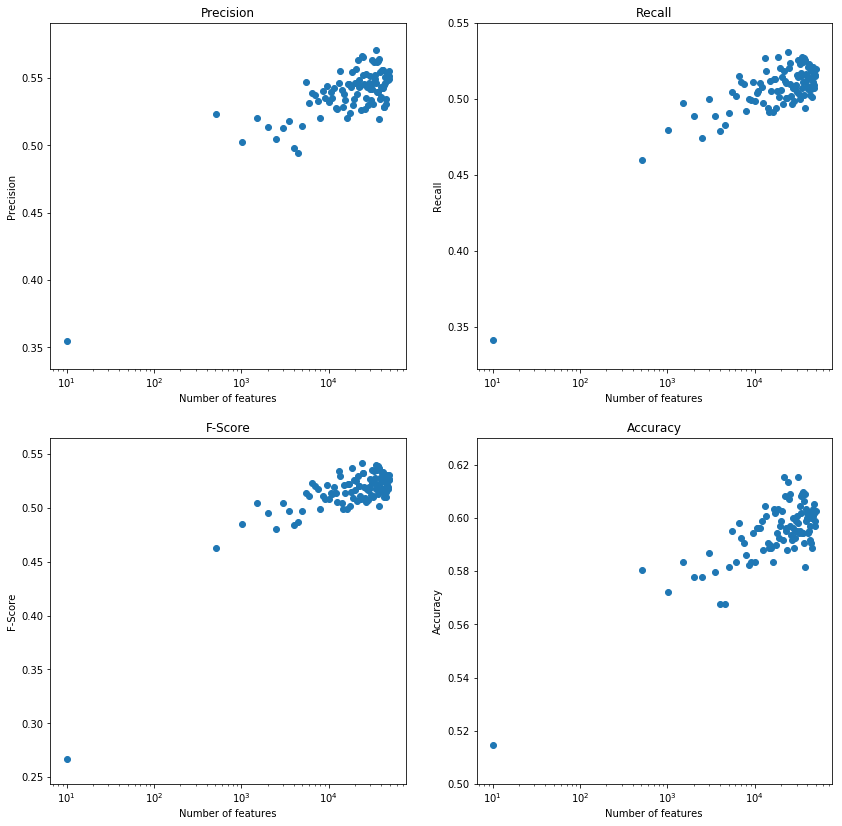

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
fig.set_size_inches(14,14)

data = [cls_on_hashes(training_set, n_features) for n_features in range(10, 50000, 500)]
n_features = [e[0] for e in data]
precision = [e[1] for e in data]
recall = [e[2] for e in data]
fscore = [e[3] for e in data]
acc = [e[4] for e in data]

axs[0,0].scatter(n_features, precision)
axs[0,0].set_title('Precision')
axs[0,0].set_ylabel('Precision')
axs[0,0].set_xlabel('Number of features')
axs[0,0].set_xscale('log')

axs[0,1].scatter(n_features, recall)
axs[0,1].set_title('Recall')
axs[0,1].set_ylabel('Recall')
axs[0,1].set_xlabel('Number of features')
axs[0,1].set_xscale('log')

axs[1,0].scatter(n_features, fscore)
axs[1,0].set_title('F-Score')
axs[1,0].set_ylabel('F-Score')
axs[1,0].set_xlabel('Number of features')
axs[1,0].set_xscale('log')

axs[1,1].scatter(n_features, acc)
axs[1,1].set_title('Accuracy')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_xlabel('Number of features')
axs[1,1].set_xscale('log')

 - Obserwując stworzony wykres - skomentuj. Jak dużo jakości klasyfikacji się traci (albo zyskuje?) korzystając z mniejszej liczby haszowanych cech? Często klasyfikatory bardzo dobrze działają nawet przy liczbie haszowanych cech dla których na pewno istnieją konflikty cech oryginalnych - jak myślisz dlaczego? (Pomyśl o interpretacji takich skonfliktowanych cech).

Nawet dla liczby cech równej 10 można zauważyć, że klasyfikator uczy się, choć dość nieudolnie. Zwiększenie liczby cech do 1000 daje bardzo zadowalające wyniki, biorąc pod uwagę, że reprezentacja każdej z próbek została bardzo uszczuplona. Dla około 10000 cech osiąga się wartości bliskie maximum, co zgadza się z intuicją, gdyż w korpusie znajduje się `16229` unikalnych wartości, więc osiągnięty jest już rząd tej wielkości.
Rozszerzenie algorytmu `feature hashing` wykorzystuje sztuczkę ze znakiem wartości modyfikującej hasz, która w pewnym stopniu pozwala radzić sobie z kolizjami. Jeśli jednak kolizje wystąpią to będą miały wpływ jedynie na część ostatecznego wyniku, więc można zakładać, że przy odpowiedniej liczbie haszowanych cech, niefortunne kolizje znikną w tłumie cech poprawnych.

 - W poprzednim zadaniu wczytałeś wynik grupowania Browna do pamięci. Wytrenuj klasyfikator na reprezentacji ,,Bag-of-clusters'' tj. w kolumnach zamiast słów/n-gramów będziesz miał grupy.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

df = brown_df.dropna()
wrds_clstr = dict(zip(df.word, df.cluster))
print("Liczba dostępnych klastrów: {}".format(len(df.cluster.unique())))
X = [' '.join([str(wrds_clstr[token]) for token in tweet.tokens if token in wrds_clstr.keys()]) for tweet in training_set.tweets]

target_val = {'negative': -1, 'neutral': 0, 'positive':1}

def cls_on_clusters(X, training_set):
    X_train, X_test, y_train, y_test = train_test_split(
            X,
            [target_val[sample.clazz] for sample in training_set.tweets],
            test_size=.2, random_state=1337)

    vectorizer = CountVectorizer(lowercase=False).fit(X_train)
    X_train_vectorized = vectorizer.transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    
    print("Liczba cech (liczba klastrów użytych w problemie): {}".format(X_train_vectorized.shape[0]))

    clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter_no_change=10)
    clf.fit(X_train_vectorized, y_train)

    pred = clf.predict(X_test_vectorized)

    precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='weighted')
    acc = accuracy_score(y_test, pred)
    
    return precision, recall, fscore, acc

precision, recall, fscore, acc = cls_on_clusters(X, training_set)
print("Precision: {}\nRecall: {}\nF-Score: {}\nAccuracy: {}".format(precision, recall, fscore, acc))

Liczba dostępnych klastrów: 937
Liczba cech (liczba klastrów użytych w problemie): 4367
Precision: 0.5811375577481033
Recall: 0.5970695970695971
F-Score: 0.5807180789511054
Accuracy: 0.5970695970695971


- Podsumuj eksperymenty: poznałeś dwie możliwości ograniczenia liczby cech - zastąpienie słów ich grupami i haszowanie cech. Jakie są wady i zalety obydwu podejść?

### Haszowanie cech
P: Wprowadza dodatkowy parametr, za pomocą, którego można kontrolować stopień złożoności reprezentacji, poprzez zadanie liczby cech. 
Pozwala to na podjęcie decyzji co do poświęcenia wyniku klasyfikacji na rzecz zauważalnego przyszpieszenia procesu uczenia. 
Dodanie nowego słowa do słownika nie wymaga wprowadzania modyfikacji dla pozostałych elementów algorytmu.

N: Z drugiej strony, haszowanie cech utrudnia interpretowanie wyników dostarczanych przez klasyfikator wytrenowany na zbiorze przetworzonym z użyciem tej techniki.

### Klastrowanie
P: Użycie grup jako części składowych wektora cech pozwala na interpretację zależności językowych. 
Osiąga lepsze wyniki dla mniejszej liczby cech, w porównaniu z podejściem z haszowaniem cech.

N: Wymaga wcześniejszego przypisania słów do grup.